In [0]:
import networkx as  nx

In [0]:
# Basics of creating a network graph
G = nx.Graph()

In [0]:
G.add_node(1)

In [0]:
G.add_nodes_from([2,3])

In [0]:
G.add_nodes_from(["u", "v"])

In [0]:
G.nodes()

NodeView((1, 2, 3, 'u', 'v'))

In [0]:
G.add_edge(1,2)

In [0]:
G.add_edge("u", "v")

In [0]:
G.add_edges_from([(1,3),(1,4),(1,5),(1,6)])

In [0]:
G.add_edge("u", "w")

In [0]:
G.edges

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')])

In [0]:
G.remove_node(2)

In [0]:
G.nodes()

NodeView((1, 3, 'u', 'v', 4, 5, 6, 'w'))

In [0]:
G.remove_nodes_from([4,5])

In [0]:
G.nodes()

NodeView((1, 3, 'u', 'v', 6, 'w'))

In [0]:
G.remove_edge(1,3)

In [0]:
G.edges()

EdgeView([(1, 6), ('u', 'v'), ('u', 'w')])

In [0]:
G.remove_edges_from([(1,2),("u","v")])

In [0]:
G.edges()

EdgeView([(1, 6), ('u', 'w')])

In [0]:
G.number_of_nodes()

6

In [0]:
G.number_of_edges()

2

In [0]:
# plotting a network graph using karate club data
G = nx.karate_club_graph()

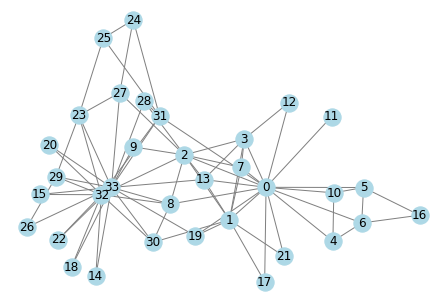

In [0]:
# plotting a network graph
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray" )
plt.savefig("karategraph")

In [0]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [0]:
G.degree()[33]

17

In [0]:
G.degree(33)

17

In [0]:
G.number_of_nodes()

34

In [0]:
G.number_of_edges()

78

In [0]:
G.degree(0) is G.degree()[0]

True

In [0]:
# plotting Erdos-Renyi graph which has two parameters, capital N (number of nodes in the graph) and lowercase p(probability for any pair of nodes to be connected by an edge). 
from scipy.stats import bernoulli 

In [0]:
bernoulli.rvs(p=0.2)

0

In [0]:
bernoulli.rvs(p=0.2)

0

In [0]:
bernoulli.rvs(p=0.2)

0

In [0]:
bernoulli.rvs(p=0.2)

0

In [0]:
N = 20
p = 0.2

In [0]:
def er_graph(N, p):
  G = nx.Graph()
  G.add_nodes_from(range(N))
  for node1 in G.nodes() :
    for node2 in G.nodes():
      if  node1 < node2 and bernoulli.rvs(p=p) :
        G.add_edge(node1, node2)
  return G

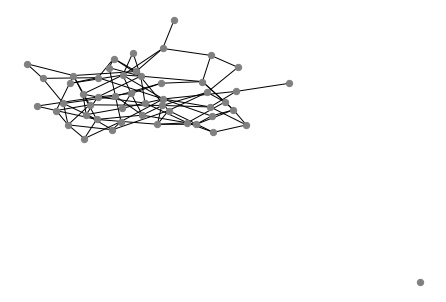

In [0]:
nx.draw(er_graph(50,0.08), node_size= 40, node_color= "gray")
plt.savefig("er1.pdf")

In [0]:
def plot_degree_distribution(G):
  # plt.hist(list(dict(G.degree()).values()), histtype="step")
  degree_sequence = [d for n, d in G.degree()]
  plt.hist(degree_sequence, histtype="step")
  plt.xlabel("Degree $k$")
  plt.ylabel("$P(k)$")
  plt.title("Degree Distribution")


In [0]:
G= er_graph(50,0.08)

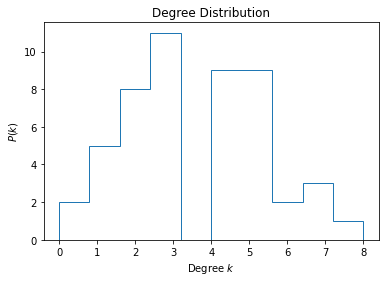

In [0]:
plot_degree_distribution(G)

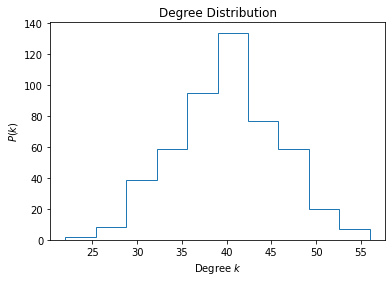

In [0]:
G= er_graph(500,0.08)
plot_degree_distribution(G)

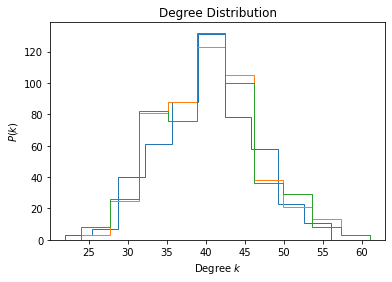

In [0]:
G1= er_graph(500,0.08)
plot_degree_distribution(G1)
G2= er_graph(500,0.08)
plot_degree_distribution(G2)
G3= er_graph(500,0.08)
plot_degree_distribution(G3)
plt.savefig("hist3.pdf")

In [0]:
import numpy as np
A1 = np.loadtxt("adj_allVillageRelationships_vilno_1.csv", delimiter=",") 
A2 = np.loadtxt("adj_allVillageRelationships_vilno_2.csv", delimiter=",") 

In [0]:
G1= nx.to_networkx_graph(A1)
G2= nx.to_networkx_graph(A2)

In [0]:
def basic_net_stats(G):
  print("Number of nodes: %d" % G.number_of_nodes())
  print("Number of edges: %d" % G.number_of_edges())
  degree_sequence = [d for n, d in G.degree()]
  print("Average degree: %.2f" % np.mean(degree_sequence))  


In [0]:
basic_net_stats(G1)
basic_net_stats(G2)

Number of nodes: 843
Number of edges: 3405
Average degree: 8.08
Number of nodes: 877
Number of edges: 3063
Average degree: 6.99


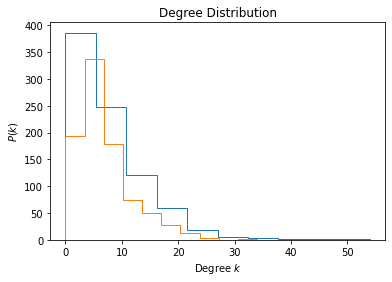

In [0]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)
plt.savefig("village_hist.pdf")

In [0]:
nx.connected_components(G1)

<generator object connected_components at 0x7fad8584e7d8>

In [0]:
gen = (G1.subgraph(c) for c in nx.connected_components(G1))

In [0]:
g = next(gen)

In [0]:
type(g)

networkx.classes.graph.Graph

In [0]:
g.number_of_nodes()

825

In [0]:
len(next(gen))

3

In [0]:
len(next(gen))

3

In [0]:
len(next(gen))

4

In [0]:

len(next(gen))

2

In [0]:
len(G1)

843

In [0]:
G1.number_of_nodes()

843

In [0]:
len(next(gen))

4

In [0]:
len(next(gen))

1

In [0]:
G1_LLC = max((G1.subgraph(c) for c in nx.connected_components(G1)), key= len)
G2_LLC = max((G2.subgraph(c) for c in nx.connected_components(G2)), key= len)

In [0]:
len(G1_LLC)

825

In [0]:

G1_LLC.number_of_nodes()

825

In [0]:
G2_LLC.number_of_nodes()

810

In [0]:
G1_LLC.number_of_nodes()/G1.number_of_nodes()

0.9786476868327402

In [0]:
G1_LLC.number_of_nodes()/G1.number_of_nodes()

0.9786476868327402

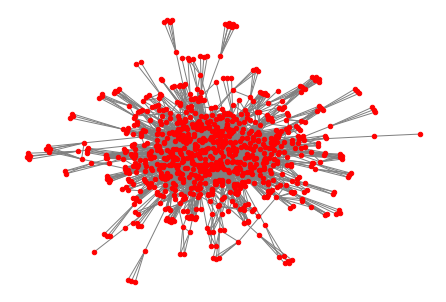

In [0]:
plt.figure()
nx.draw(G1_LLC, node_size=20, node_color="red", edge_color="gray")
plt.savefig("village1.pdf")

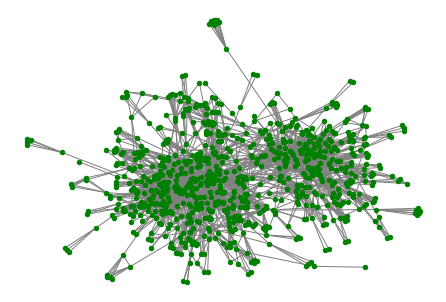

In [0]:
plt.figure()
nx.draw(G2_LLC, node_size=20, node_color="green", edge_color="gray")
plt.savefig("village2.pdf")